# Example Notebook to showcasing how we interact with JTReaders

In [1]:
# First change dir to Jack parent
import os
os.chdir('..')

In [2]:
# Configure Jack logger to print to standard output, that is console
import sys
import os
import logging
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
logger = logging.getLogger(os.path.basename(sys.argv[0]))

### Bookkeeping of all existing readers: `readers.py`

In [3]:
import jtr.jack.readers as readers
print("Existing models:\n%s" % ", ".join(readers.readers.keys()))

Existing models:
modelf_reader, fastqa_reader, example_reader, snli_reader


### Datasets

In [4]:
from jtr.jack.core.data_structures import load_labelled_data
# Read in NYT snippet
data = load_labelled_data("data/NYT/naacl2013_snippet.jtr.json")

### Create a reader

In [5]:
from jtr.preprocess.vocab import Vocab
# Create example reader with a basic config
config = {"batch_size": 128, "repr_dim": 100}
reader = readers.readers["modelf_reader"](Vocab(), config)

### Add hooks

In [6]:
# We create hooks which keep track of the metrics such as the loss
# We also create a classification metric monitoring hook for our model
from jtr.jack.train.hooks import LossHook
hooks = [LossHook(reader, iter_interval=10),
         readers.eval_hooks['modelf_reader'](reader, data, iter_interval=25)]

None


### Initialize optimizer

In [7]:
# Here we initialize our optimizer
# we choose Adam with standard momentum values and learning rate 0.001
import tensorflow as tf
learning_rate = 0.005
optim = tf.train.AdamOptimizer(learning_rate)

### Train reader

In [8]:
# Lets train the reader on the CPU for 10 epochs
reader.train(optim, data,
             hooks=hooks, max_epochs=10,
             device='/cpu:0')

INFO:root:Setting up data and model...
INFO:root:Start training...
INFO:jtr.jack.train.hooks:Started evaluation KBPEvalHook
None
None
INFO:jtr.jack.train.hooks:Epoch 1	Iter 7	total 1000	epoch: 0.896	exact: 0.732	KBPEvalHook
INFO:jtr.jack.train.hooks:Epoch 2	Iter 10	Loss 177.128419495
INFO:jtr.jack.train.hooks:Started evaluation KBPEvalHook
None
None
INFO:jtr.jack.train.hooks:Epoch 2	Iter 14	total 1000	epoch: 1.792	exact: 0.869	KBPEvalHook
INFO:jtr.jack.train.hooks:Epoch 3	Iter 20	Loss 175.237355042
INFO:jtr.jack.train.hooks:Started evaluation KBPEvalHook
None
None
INFO:jtr.jack.train.hooks:Epoch 3	Iter 21	total 1000	epoch: 2.688	exact: 0.894	KBPEvalHook
INFO:jtr.jack.train.hooks:Started evaluation KBPEvalHook
None
None
INFO:jtr.jack.train.hooks:Epoch 4	Iter 25	total 1000	epoch: 2.688	exact: 0.894	KBPEvalHook
INFO:jtr.jack.train.hooks:Started evaluation KBPEvalHook
None
None
INFO:jtr.jack.train.hooks:Epoch 4	Iter 28	total 1000	epoch: 3.584	exact: 0.896	KBPEvalHook
INFO:jtr.jack.train.ho

### Plotting the results

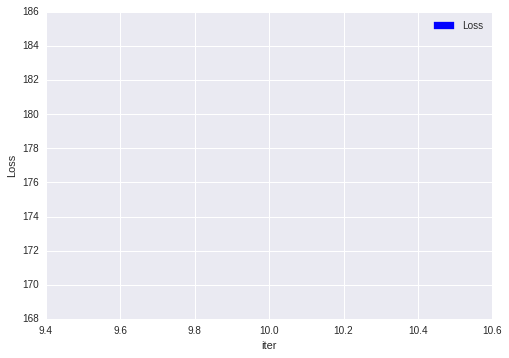

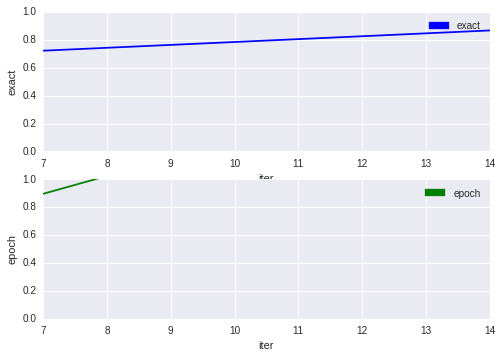

In [13]:
# This plots the loss
hooks[0].plot()
# This plots the F1 (macro) score and accuracy between 0 and 1
hooks[1].plot(ylim=[0.0, 1.0])